<a href="https://colab.research.google.com/github/sam19980822/3rd-ML100Days/blob/master/Day077_HW_ipynb_(Overfitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers


Using TensorFlow backend.


In [0]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333) 這行沒用，要改成以下兩行才可跑
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))


In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




用ADAM + epochs＝100 看看有無過擬合

In [8]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 5s 92us/step - loss: 1.9288 - acc: 0.3031 - val_loss: 1.8171 - val_acc: 0.3467
Epoch 2/100
50000/50000 [==============================] - 2s 30us/step - loss: 1.7121 - acc: 0.3878 - val_loss: 1.6483 - val_acc: 0.4141
Epoch 3/100
50000/50000 [==============================] - 2s 30us/step - loss: 1.6201 - acc: 0.4231 - val_loss: 1.6053 - val_acc: 0.4346
Epoch 4/100
50000/50000 [==============================] - 2s 30us/step - loss: 1.5590 - acc: 0.4442 - val_loss: 1.5522 - val_acc: 0.4417
Epoch 5/100
50000/50000 [==============================] - 1s 29us/step - loss: 1.5086 - acc: 0.4629 - val_loss: 1.5651 - val_acc: 0.4461
Epoch 6/100
50000/50000 [==============================] - 1s 30us/step - loss: 1.4764 - acc: 0.4718 - val_loss: 1.4775 - val_acc: 0.4696
Epoch 7/100
50000/50

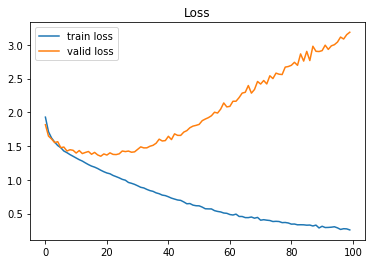

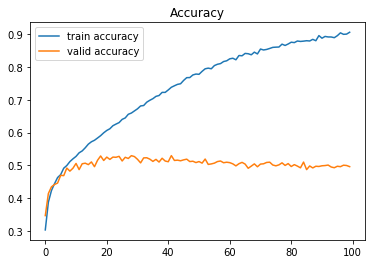

In [9]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

很明顯過擬合了（Train下降很快，Validation卻一場災難）


那如果是ADAM + EPOCHS=500的組合呢

In [10]:
model2 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model2.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
# 訓練模型並檢視驗證集的結果
model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 39u

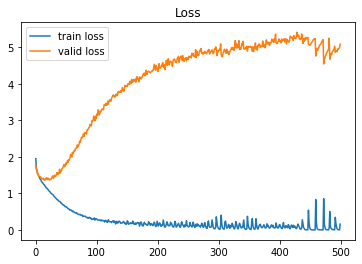

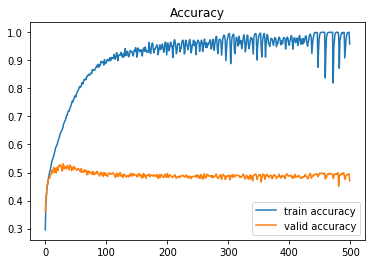

In [11]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Epochs太大 容易讓training set都像是在背答案(彷彿把所有考古題都被看完了)  
準確率高得不可思議(0.95)，形成最明顯的overfit 


那如果是把演算法換成SGD呢(Epochs = 100)

In [12]:
model3 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model3.summary()

optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
# 訓練模型並檢視驗證集的結果
model3.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 35u

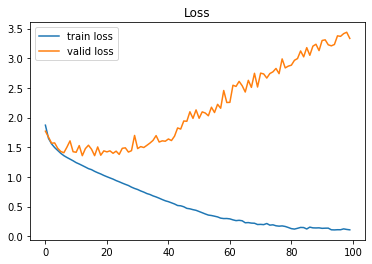

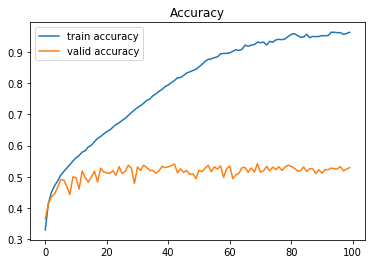

In [14]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model3.history.history["loss"]
valid_loss = model3.history.history["val_loss"]

train_acc = model3.history.history["acc"]
valid_acc = model3.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Conclusion
從這個case來看，SGD在train set效果比ADAM好（validation set都很糟）  
Epochs越大越容易發生過擬合，要挑選適合的大小